In [330]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import csv
import pymongo
from time import sleep
from datetime import datetime

%matplotlib inline

https://oauth.vk.com/authorize?client_id=5453402&display=page&redirect_uri=http://localhost&scope=&response_type=token&v=5.53

In [331]:
token = '563fbc6dc0b5b7916d1709141f1c13303d7a390ce8051ae11294b7e36b129d0f6fa436fc19dfee434b373'

In [332]:
group_id = '-48632629'

In [333]:
posts = 100

In [334]:
offset = 0

In [337]:
header = ['id', 'date', 'likes', 'reposts', 'views']
def write_csv(data):
	with open('posts_data.csv', 'w', encoding="utf-8") as file:
		writer = csv.writer(file, delimiter=',')
		writer.writerow(i for i in header)
		for j in data:
			writer.writerow((j['id'],
						 j['date'],
						 j['likes'],
						 j['reposts'],
						 j['views']
						))
def get_data(postdict):
	try:
		post_id = postdict['id']
	except:
		post_id = 0
		
	try:
		post_date = postdict['date']
	except:
		post_date = 0
		
	try:
		likes = postdict['likes']['count']
	except:
		likes = 'zero'
	
	try:
		reposts = postdict['reposts']['count']
	except:
		reposts = 'zero'	
		
	try:
		views = postdict['views']['count']
	except:
		views = 'zero'	
		
	data = {
		'id': post_id,
		'date': datetime.utcfromtimestamp(post_date).strftime('%Y-%m-%d %H:%M:%S'),
		'likes': likes,
		'reposts': reposts,
		'views': views,
	}
	
	return data

all_posts = []

sleep(1)
r = requests.get('https://api.vk.com/method/wall.get',params={'access_token':token,'owner_id':group_id,'count':posts,'offset':offset,'v':5.68})
posts = r.json()['response']['items']

all_posts.extend(posts)

data_posts = []

for postdict in all_posts:
#     post_data = get_data(postdict)
    data_posts.append(get_data(postdict))

write_csv(data_posts)

In [452]:
# with open('posts_data.csv', 'r', encoding="utf-8") as fp:
#     reader = csv.reader(fp, delimiter=',', quotechar='"')
#     # next(reader, None)  # skip the headers
#     data_read = [row for row in reader]
# print(data_read)

gcd = pd.read_csv('posts_data.csv')
gcd = gcd.sort_values(by=['likes'], ascending=False)
gcd.head(10)

,id,date,likes,reposts,views
62,7323,2020-04-23 19:26:19,108,2,2372
59,7332,2020-04-26 07:44:24,53,11,2908
67,7309,2020-04-21 13:04:39,50,18,3243
91,7271,2020-04-07 15:01:03,40,0,1546
13,7606,2020-05-28 16:00:11,27,3,1465
15,7600,2020-05-28 15:03:52,27,0,1697
45,7480,2020-04-30 16:07:28,26,4,2072
57,7396,2020-04-26 08:27:51,25,3,2355
65,7314,2020-04-21 16:50:07,23,0,2184
11,7610,2020-05-29 13:39:09,22,0,1884


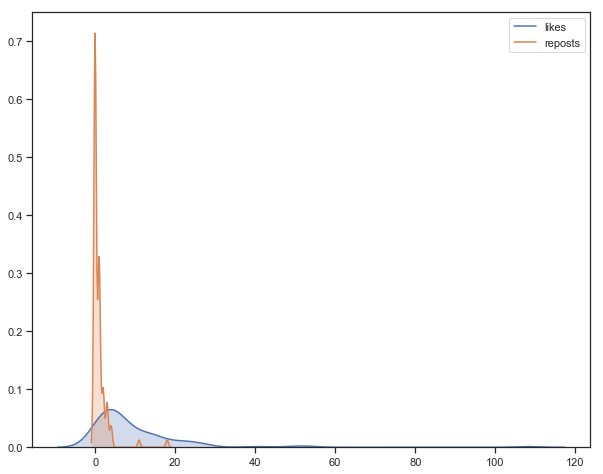

In [472]:
for col in ['likes', 'reposts']:
    sns.kdeplot(gcd[col], shade=True)

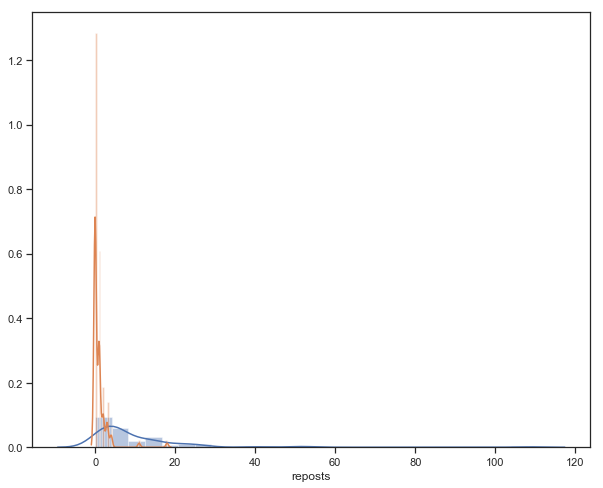

In [473]:
sns.distplot(gcd['likes'])
sns.distplot(gcd['reposts']);

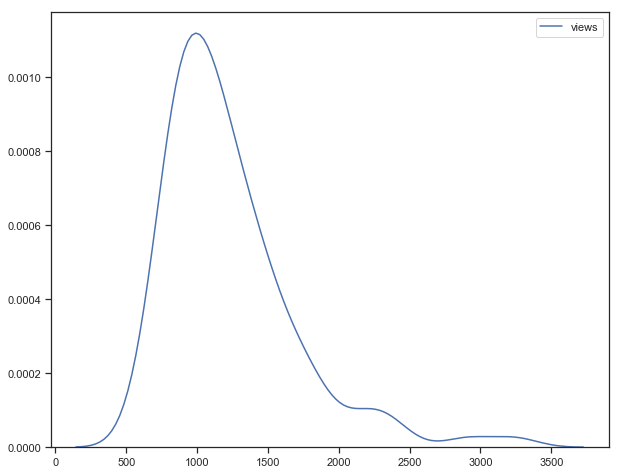

In [470]:
sns.kdeplot(gcd['views']);

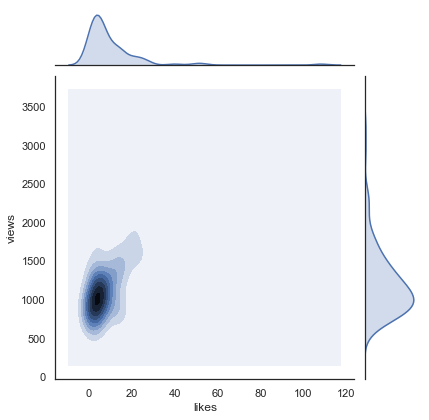

In [475]:
with sns.axes_style('white'):
    sns.jointplot("likes", "views", data=gcd, kind='kde');

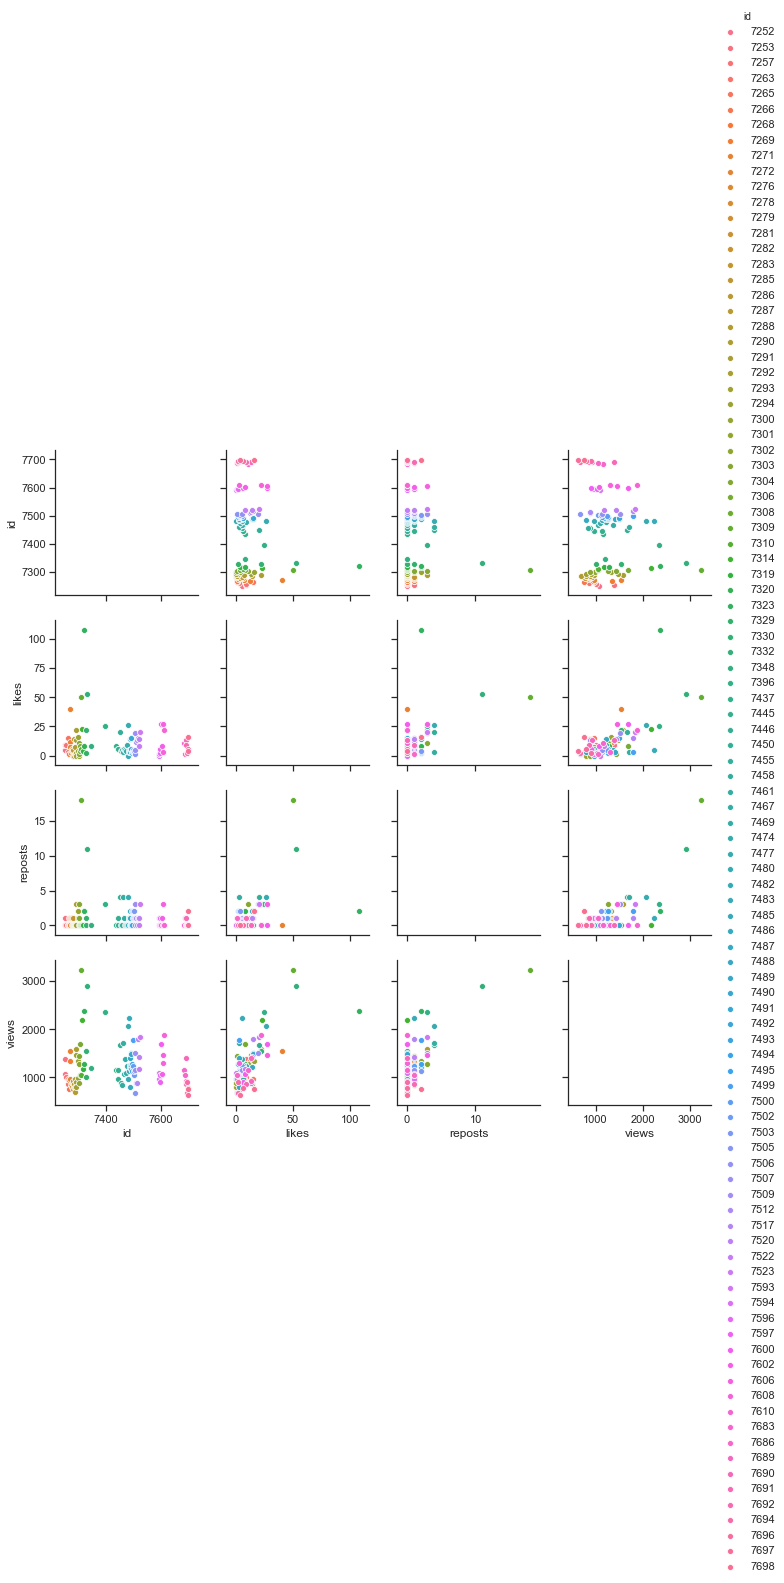

In [478]:
sns.pairplot(data=gcd, hue='id', height=2.5);

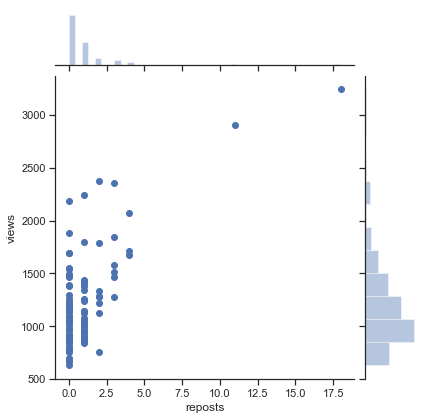

In [458]:
sns.jointplot(x='reposts', y='views', data=gcd)

Text(0.5, 1.0, 'gcd.corr()')

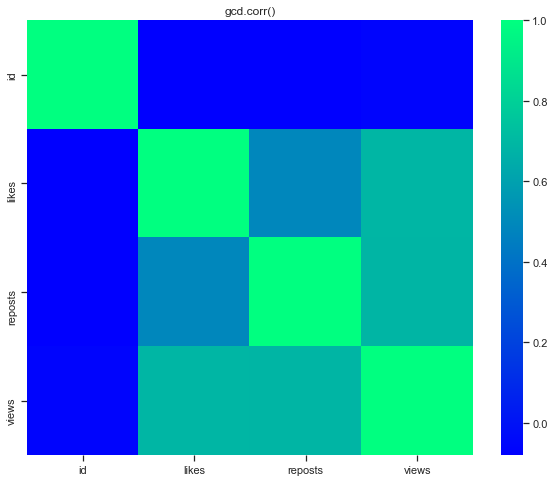

In [456]:
sns.set(style="ticks")
sns.heatmap(gcd.corr(), cmap='winter')
plt.title('gcd.corr()')

K:\Programs\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


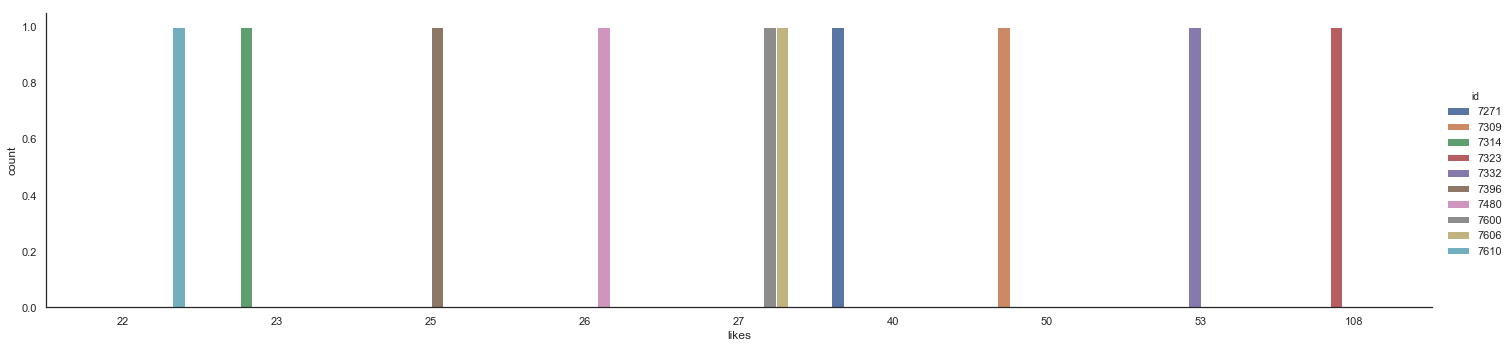

In [485]:
df = gcd.head(10)

with sns.axes_style('white'):
    g = sns.factorplot("likes", data=df, aspect=4.0, kind='count', hue='id')

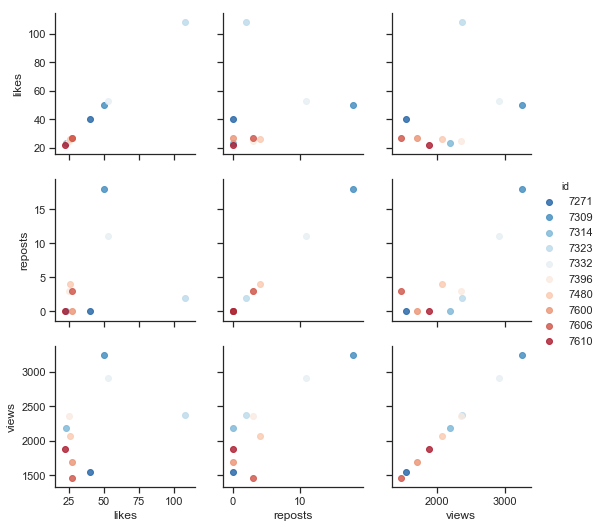

In [488]:
g = sns.PairGrid(data = df, vars=['likes', 'reposts', 'views'],
                 hue='id', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [348]:
gcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
id         100 non-null int64
date       100 non-null object
likes      100 non-null int64
reposts    100 non-null int64
views      100 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [397]:
d = { 'mean values':['m_likes', 'm_reposts', 'm_views'], 'value':[gcd['likes'].mean(), gcd['reposts'].mean(), gcd['views'].mean()]  }

df=pd.DataFrame(data = d)

In [399]:
df

,mean values,value
0,m_likes,10.12
1,m_reposts,1.01
2,m_views,1229.00


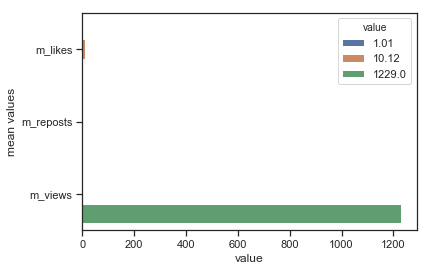

In [407]:
sns.barplot(x="value", y="mean values", data=df, hue="value")

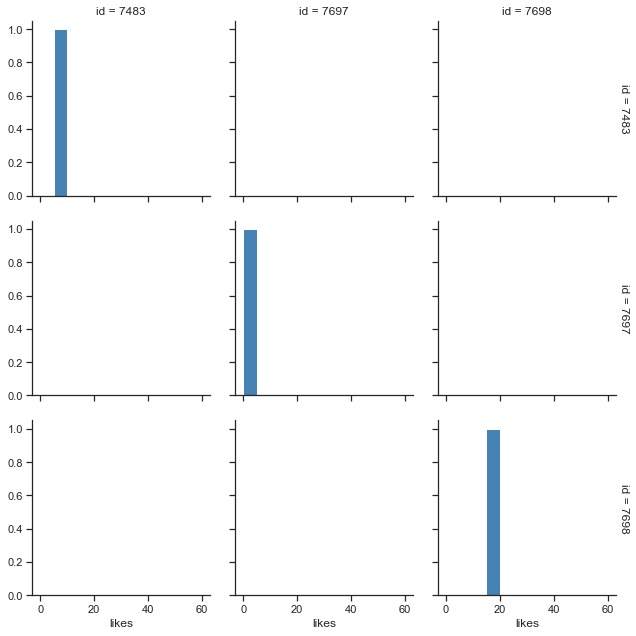

In [428]:
df = gcd.head(3)
g = sns.FacetGrid(data = df, row="id", col="id", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "likes", color="steelblue", bins=bins)

In [453]:
df = gcd.head(20)

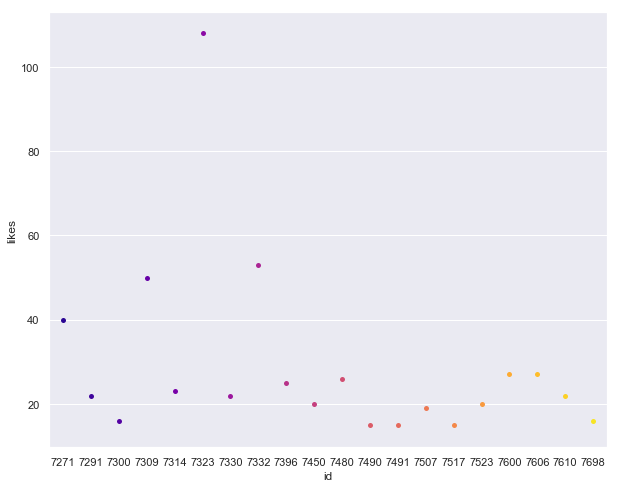

In [454]:
sns.set(rc={'figure.figsize':(10,8)})
sns.swarmplot(x='id', y="likes", data=df, palette='plasma')